In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.0-tf


In [2]:
#Downloading the dataset and loading it.
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
#Creating training and validation datasets and rescaling the pixel values to the range: [0,1]
x_val, x_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_val, y_train = y_train_full[:5000], y_train_full[5000:]


Ankle boot


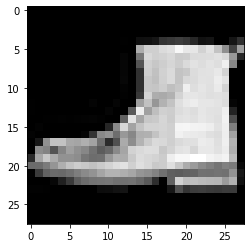

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(class_names[y_train[3]])
plt.imshow(x_train[3]*255., cmap='gray')
plt.show()

Building a standard ANN using sequential API of keras

In [ ]:
#Defining the ANN model
NN_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compiling the model i.e, defining the loss function, the optimizer and some other metrics to be calculated
NN_model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
#Training and evaluation of the model
history = NN_model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=20)

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7240 - accuracy: 0.7621 - val_loss: 0.5145 - val_accuracy: 0.8314
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4902 - accuracy: 0.8299 - val_loss: 0.4461 - val_accuracy: 0.8500
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4440 - accuracy: 0.8447 - val_loss: 0.4267 - val_accuracy: 0.8588
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4158 - accuracy: 0.8543 - val_loss: 0.4256 - val_accuracy: 0.8532
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3942 - accuracy: 0.8626 - val_loss: 0.3960 - val_accuracy: 0.8636
Epoch 6/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3786 - accuracy: 0.8667 - val_loss: 0.3762 - val_accuracy: 0.8642
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3644 - accuracy: 0.8713 - val_loss: 0.3663 - val_accuracy:

In [5]:
#Plotting the learning curves
import pandas as pd
import numpy as np

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

'pd.DataFrame(history.history).plot(figsize=(8,5))\nplt.grid(True)\nplt.gca().set_ylim(0,1)\nplt.show()'

“ In this particular case, the model looks like it performed better on the validation set than on the training set at the beginning of training. But that’s not the case: indeed, the validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch. So the training curve should be shifted by half an epoch to the left. If you do that, you will see that the training and validation curves overlap almost perfectly at the beginning of training.”

Excerpt From: Aurélien Géron. “Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow”. Apple Books. 

In [ ]:
#Evaluating the model on the test set
NN_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 69.5382 - accuracy: 0.8317


[69.5381851196289, 0.8317000269889832]

In [ ]:
#Making predictions on new instances, since we don't have more data we will use first three entries of test data
x_new = X_test[:3]
NN_model.predict(x_new) #This gives a one-hot encoded array for each instance

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser' ... 'Bag' 'Trouser' 'Sandal']


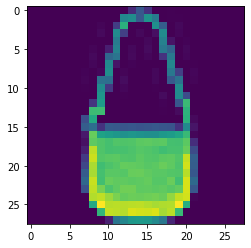

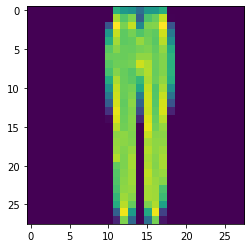

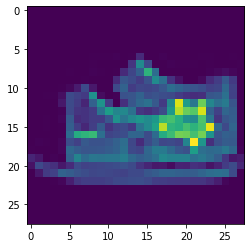

['Ankle boot' 'Pullover' 'Trouser' ... 'Bag' 'Trouser' 'Sandal']


In [ ]:
#To get class predictions we can use:
ypred_classes = NN_model.predict_classes(X_test)
print(ypred_classes[0:3])
print(np.array(class_names)[ypred_classes])
plt.imshow(X_test[-3])
plt.show()
plt.imshow(X_test[-2])
plt.show()
plt.imshow(X_test[-1])
plt.show()
print(np.array(class_names)[y_test])

As we can see our model has classified the clothing items correctly

In [ ]:
#Saving the NN_model
NN_model.save("NN_model.h5")

Now we will build a CNN model

In [6]:
CNN_model = keras.models.Sequential([
    layers.Conv2D(64, 3, activation='relu', padding='same', input_shape=[28,28,1]),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [7]:
x_train_cnn = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)
x_val_cnn = x_val.reshape(x_val.shape[0], 28, 28, 1)

In [8]:
optimizer = keras.optimizers.Adam()
CNN_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
CNN_model_history = CNN_model.fit(x_train_cnn, y_train, validation_data=(x_val_cnn, y_val), epochs=20)

Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6968 - acc: 0.7527 - val_loss: 0.3419 - val_acc: 0.8824
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4334 - acc: 0.8511 - val_loss: 0.2820 - val_acc: 0.8960
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3691 - acc: 0.8737 - val_loss: 0.2748 - val_acc: 0.9044
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3292 - acc: 0.8875 - val_loss: 0.2377 - val_acc: 0.9144
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2947 - acc: 0.8994 - val_loss: 0.2312 - val_acc: 0.9160
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2810 - acc: 0.9035 - val_loss: 0.2274 - val_acc: 0.9184
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2612 - acc: 0.9104 - val_loss: 0.2237 - val_acc: 0.9218
Epoch 8/20
1719/1719 [==============================] - 6s 3ms

In [9]:
CNN_model.save("CNN_model.h5")

We can see that our validation accuracy improved by almost 3% and this model fits the data much better than our standard ANN.

Further plan of action can be that we try a model which fits much better to the data, this is likely to improve the validation accuracy as well. However, if there is a case of severe overfitting and we do not get the expected results; we can use some regularization in our model.

We will not go into this dataset further and will move on to some datasets which are more complex than this one.